## Public AI Open API 

In [1]:
with open('AI api.txt', mode = 'r') as key_file :
    ai = key_file.read()

In [2]:
import urllib3
import json
import base64
openApiURL = 'http://aiopen.etri.re.kr:8000/ObjectDetect'

In [3]:
IMG_FILE = 'images/ship.jpg'

In [4]:
import os
img_file = IMG_FILE
_, img_type = os.path.splitext(img_file)
img_type

'.jpg'

In [5]:
img_type = 'jpg' if img_type == '.jifi' else img_type[1:]
img_type

'jpg'

In [13]:
with open(img_file, 'rb') as file :   # read binary
    img_contents = base64.b64encode(file.read()).decode("utf8")

In [14]:
requestJson = {
    "access_key": ai,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

In [15]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(requestJson)
)

In [16]:
print("[responseCode] " + str(response.status))
print("[responBody]")
print(response.data)

[responseCode] 200
[responBody]
b'{"result":0,"return_object":{"data":[{"class":"boat","confidence":"0.806527","x":"455","y":"121","width":"247","height":"316"},{"class":"bird","confidence":"0.652454","x":"-16","y":"60","width":"316","height":"69"}]}}'


In [17]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"boat","confidence":"0.806527","x":"455","y":"121","width":"247","height":"316"},{"class":"bird","confidence":"0.652454","x":"-16","y":"60","width":"316","height":"69"}]}}'

In [18]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'boat',
    'confidence': '0.806527',
    'x': '455',
    'y': '121',
    'width': '247',
    'height': '316'},
   {'class': 'bird',
    'confidence': '0.652454',
    'x': '-16',
    'y': '60',
    'width': '316',
    'height': '69'}]}}

In [19]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'boat',
 'confidence': '0.806527',
 'x': '455',
 'y': '121',
 'width': '247',
 'height': '316'}

### Visualization

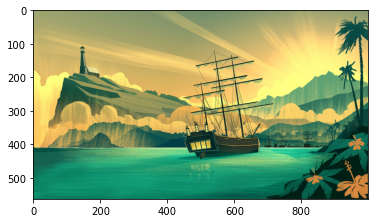

In [20]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
image = Image.open(img_file)
plt.imshow(image)
plt.show()

In [21]:
draw = ImageDraw.Draw(image)
obj = obj_list[0]
name = obj['class']
x = int(obj['x'])
y = int(obj['y'])
w = int(obj['width'])
h = int(obj['height'])
draw.text((x + 20, y + 20), name, font = ImageFont.truetype('AppleGothic', 20), fill = (255, 0, 0))
draw.rectangle(((x, y), (x + w, y + w)), outline = (255, 0, 0), width = 2)

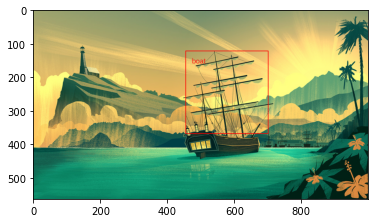

In [22]:
plt.imshow(image)
plt.show()